# Exercise 2-2: Write your own code for the Mortality Notebook

In [1]:
import pandas as pd

## Get the long and wide DataFrames

In [2]:
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [3]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


## Work With the long DataFrame

In [4]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [5]:
mortality_data.columns = mortality_data.columns.str.replace("Death Rate", "Deaths/100K")

In [6]:
mortality_data['MeanCentered'] = \
    mortality_data['Deaths/100K'] - mortality_data['Deaths/100K'].mean()

In [7]:
mortality_data[['Year','MeanCentered']].head(5)

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


In [8]:
mortality_data.query('Year >= 1915 and Year <= 1920').tail(6)

,Year,Age Group,Deaths/100K,MeanCentered
372,1915,15-19 Years,330.9,137.97584
373,1916,15-19 Years,355.8,162.87584
374,1917,15-19 Years,380.3,187.37584
375,1918,15-19 Years,777.4,584.47584
376,1919,15-19 Years,438.5,245.57584
377,1920,15-19 Years,402.9,209.97584


In [9]:
mortality_data['Age Group'].replace(
    {'1-4 Years':'01-04 Years','5-9 Years':'05-09 Years'},
    inplace = True)

In [10]:
mortality_data.query('`Age Group` == "01-04 Years"')[['Year','Deaths/100K']]

,Year,Deaths/100K
0,1900,1983.8
1,1901,1695.0
2,1902,1655.7
3,1903,1542.1
4,1904,1591.5
...,...,...
114,2014,24.0
115,2015,24.9
116,2016,25.3
117,2017,24.3


In [11]:
with pd.option_context(
    'display.max_rows', 7,
    'display.max_columns', None):
    display(mortality_data.sort_values('Deaths/100K', ascending = False))

,Year,Age Group,Deaths/100K,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
...,...,...,...,...
233,2014,05-09 Years,11.5,-181.42416
229,2010,05-09 Years,11.5,-181.42416
231,2012,05-09 Years,11.4,-181.52416


In [12]:
mortality_data['Deaths/100K'].median()

89.5

In [13]:
mortality_data.groupby('Year')[['Deaths/100K']].sum()

,Deaths/100K
Year,
1900,3233.0
1901,2850.6
1902,2733.0
1903,2659.1
1904,2793.1
...,...
2014,95.0
2015,99.5
2016,103.3


## Work with the wide DataFrame

In [14]:
mortality_wide.head(5)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


In [15]:
mortality_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         119 non-null    int64  
 1   01-04 Years  119 non-null    float64
 2   05-09 Years  119 non-null    float64
 3   10-14 Years  119 non-null    float64
 4   15-19 Years  119 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [16]:
mortality_wide.describe()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1959.000000,0.003832,0.001173,0.000938,0.001774
std,34.496377,0.005005,0.001275,0.000884,0.001384
min,1900.000000,0.000240,0.000114,0.000139,0.000448
25%,1929.500000,0.000507,0.000240,0.000272,0.000855
50%,1959.000000,0.001091,0.000484,0.000446,0.001069
75%,1988.500000,0.005773,0.001989,0.001589,0.002837
max,2018.000000,0.019838,0.004661,0.003751,0.007774


In [17]:
mortality_wide.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,119.0,1959.000000,34.496377,1900.000000,1929.500000,1959.000000,1988.500000,2018.000000
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


In [18]:
mortality_wide[['Year','01-04 Years']]

,Year,01-04 Years
0,1900,0.019838
1,1901,0.016950
2,1902,0.016557
3,1903,0.015421
4,1904,0.015915
...,...,...
114,2014,0.000240
115,2015,0.000249
116,2016,0.000253
117,2017,0.000243


In [19]:
mortality_wide.query('Year == 1915 and Year <= 1920')

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,0.009242,0.002606,0.001967,0.003309


In [20]:
mortality_wide[['Year','01-04 Years']].query('Year >= 1915 and Year <= 1920')

,Year,01-04 Years
15,1915,0.009242
16,1916,0.011115
17,1917,0.010660
18,1918,0.015735
19,1919,0.009280
20,1920,0.009872


In [21]:
mortality_wide[['01-04 Years','05-09 Years','10-14 Years','15-19 Years']].agg(['median', 'mean', 'sum'])

,01-04 Years,05-09 Years,10-14 Years,15-19 Years
median,0.001091,0.000484,0.000446,0.001069
mean,0.003832,0.001173,0.000938,0.001774
sum,0.456039,0.139618,0.111586,0.211076


In [22]:
mortality_wide['Total Deaths'] = mortality_wide['01-04 Years'] + mortality_wide['05-09 Years'] + mortality_wide['10-14 Years'] + mortality_wide['15-19 Years']

In [23]:
mortality_wide

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,Total Deaths
0,1900,0.019838,0.004661,0.002983,0.004848,0.032330
1,1901,0.016950,0.004276,0.002736,0.004544,0.028506
2,1902,0.016557,0.004033,0.002525,0.004215,0.027330
3,1903,0.015421,0.004147,0.002682,0.004341,0.026591
4,1904,0.015915,0.004250,0.003052,0.004714,0.027931
...,...,...,...,...,...,...
114,2014,0.000240,0.000115,0.000140,0.000455,0.000950
115,2015,0.000249,0.000117,0.000146,0.000483,0.000995
116,2016,0.000253,0.000122,0.000146,0.000512,0.001033
117,2017,0.000243,0.000116,0.000155,0.000515,0.001029


<AxesSubplot:xlabel='Year'>

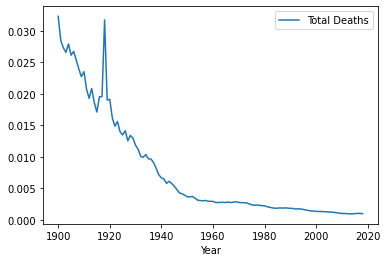

In [24]:
mortality_wide.plot('Year', 'Total Deaths')